# Analisis Korelasi antara Akses Komputer, Akses Internet, Tingkat Pendidikan, Human Development Index (HDI), dan Jenis Kelamin dengan Kualitas Pendidikan 

In [588]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

## Load & Read Dataset

### Deskripsi dataset:
1. SE_ACS_CMPTR: Persentase sekolah berdasarkan jenjang pendidikan (dasar, menengah pertama, dan menengah atas) yang memiliki akses ke fasilitas komputer.
2. SE_ACS_INTNT: Persentase sekolah yang memiliki akses ke fasilitas internet
3. SE_TOT_PRFL: Proporsi / persentase anak-anak dan remaja yang mencapai tingkat kemahiran minimum dalam membaca dan matematika
4. HDI: Human Development Index (HDI) adalah ukuran ringkasan pencapaian rata-rata dalam dimensi-dimensi utama pembangunan manusia, yaitu umur panjang dan sehat, berpengetahuan luas, dan memiliki standar hidup yang layak. IPM adalah rata-rata geometris indeks yang dinormalisasi untuk masing-masing dari tiga dimensi. Dataset ini merupakan dataset eksternal yang didapatkan pada [tautan berikut](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). Data HDI yang digunakan adalah data HDI di setiap negara pada tahun 2022


In [589]:
SHEET_NAME = 'Table format'

se_acs_cmptr_original = pd.read_excel('Dataset/SE_ACS_CMPTR.xlsx', sheet_name=SHEET_NAME)
se_acs_intnt_original = pd.read_excel('Dataset/SE_ACS_INTNT.xlsx', sheet_name=SHEET_NAME)
se_tot_prfl_original = pd.read_excel('Dataset/SE_TOT_PRFL.xlsx', sheet_name=SHEET_NAME)
hdi_original = pd.read_excel('Dataset/HDR23-24_Statistical_Annex_HDI_Table.xlsx', sheet_name='HDI', skiprows=5, usecols=[1,2])

In [590]:
se_acs_cmptr_original.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Education level,Reporting Type,Units,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,4,4.a,4.a.1,SE_ACS_CMPTR,Proportion of schools with access to computers...,4,Afghanistan,LOWSEC,G,PERCENT,...,NaN,NaN,NaN,NaN,NaN,10.30588,NaN,NaN,NaN,NaN
1,4,4.a,4.a.1,SE_ACS_CMPTR,Proportion of schools with access to computers...,4,Afghanistan,PRIMAR,G,PERCENT,...,NaN,NaN,NaN,NaN,NaN,8.95870,NaN,NaN,NaN,NaN
2,4,4.a,4.a.1,SE_ACS_CMPTR,Proportion of schools with access to computers...,4,Afghanistan,SECOND,G,PERCENT,...,NaN,NaN,NaN,NaN,NaN,17.82398,NaN,NaN,NaN,NaN
3,4,4.a,4.a.1,SE_ACS_CMPTR,Proportion of schools with access to computers...,4,Afghanistan,UPPSEC,G,PERCENT,...,NaN,NaN,NaN,NaN,NaN,23.47119,NaN,NaN,NaN,NaN
4,4,4.a,4.a.1,SE_ACS_CMPTR,Proportion of schools with access to computers...,8,Albania,LOWSEC,G,PERCENT,...,NaN,NaN,NaN,NaN,71.30112,82.82112,100.0,83.02048,NaN,NaN


In [591]:
se_acs_intnt_original.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Education level,Reporting Type,Units,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,4,4.a,4.a.1,SE_ACS_INTNT,Proportion of schools with access to the inter...,8,Albania,LOWSEC,G,PERCENT,...,NaN,NaN,NaN,NaN,68.32714,83.92435,100.00000,72.26962,NaN,NaN
1,4,4.a,4.a.1,SE_ACS_INTNT,Proportion of schools with access to the inter...,8,Albania,PRIMAR,G,PERCENT,...,NaN,NaN,NaN,NaN,46.76692,50.70873,56.81391,72.26962,NaN,NaN
2,4,4.a,4.a.1,SE_ACS_INTNT,Proportion of schools with access to the inter...,8,Albania,SECOND,G,PERCENT,...,NaN,NaN,NaN,NaN,74.40217,85.90034,100.00000,70.77844,62.05444,NaN
3,4,4.a,4.a.1,SE_ACS_INTNT,Proportion of schools with access to the inter...,8,Albania,UPPSEC,G,PERCENT,...,NaN,NaN,NaN,76.19048,90.90909,90.94567,100.00000,67.26908,NaN,NaN
4,4,4.a,4.a.1,SE_ACS_INTNT,Proportion of schools with access to the inter...,12,Algeria,LOWSEC,G,PERCENT,...,NaN,NaN,NaN,NaN,NaN,NaN,59.89676,NaN,NaN,93.21817


In [592]:
se_tot_prfl_original.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Education level,Reporting Type,Sex,...,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,8,Albania,LOWSEC,G,BOTHSEX,...,NaN,NaN,46.71703,NaN,NaN,57.62715,NaN,NaN,26.05,NaN
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,8,Albania,LOWSEC,G,BOTHSEX,...,NaN,NaN,49.72273,NaN,NaN,47.76432,NaN,NaN,26.29,NaN
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,8,Albania,LOWSEC,G,FEMALE,...,NaN,NaN,48.80595,NaN,NaN,59.42498,NaN,NaN,29.33,NaN
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,8,Albania,LOWSEC,G,FEMALE,...,NaN,NaN,NaN,NaN,NaN,58.04195,NaN,NaN,34.80,NaN
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,8,Albania,LOWSEC,G,MALE,...,NaN,NaN,44.61966,NaN,NaN,55.90192,NaN,NaN,23.03,NaN


In [593]:
hdi_original.head()

,Country,Value
0,NaN,2022
1,VERY HIGH HUMAN DEVELOPMENT,NaN
2,Switzerland,0.967
3,Norway,0.966
4,Iceland,0.959


## Data Wrangling (Preprocessing dan Tranformasi Data)

Pada tahap ini, dilakukan perubahan nama kolom dan penghapusan kolom yang tidak relevan dengan proses analisis. Selain itu, pada tahap ini dilakukan penanganan missing values. Penanganan missing values dilakukan dengan metode fill forward (ffill). Cara kerja dari metode ini adalah dengan mengisi nilai kosong dengan nilai terakhir yang tersedia sebelum nilai kosong tersebut. Langkah- langkah ini dilakukan untuk mempermudah proses analisis.

### SE_ACS_CMPTR

In [594]:
# Menghapus kolom yang tidak relevan
se_acs_cmptr = se_acs_cmptr_original.copy()

In [595]:
# Mengganti nama kolom
se_acs_cmptr.rename(columns={'GeoAreaName': 'negara', '2023':'akses_komputer', 'Education level': 'tingkat_pendidikan'}, inplace=True)
se_acs_cmptr.columns = se_acs_cmptr.columns.str.lower()

In [596]:
# Mengisi nilai kosong
se_acs_cmptr = se_acs_cmptr.fillna(method='ffill',axis=1)

In [597]:
# Menghapus kolom yang tidak relevan
se_acs_cmptr = se_acs_cmptr[['negara', 'tingkat_pendidikan', 'akses_komputer']]

In [598]:
se_acs_cmptr.head()

,negara,tingkat_pendidikan,akses_komputer
0,Afghanistan,LOWSEC,10.30588
1,Afghanistan,PRIMAR,8.9587
2,Afghanistan,SECOND,17.82398
3,Afghanistan,UPPSEC,23.47119
4,Albania,LOWSEC,83.02048


### SE_ACS_INTNT

In [599]:
se_acs_intnt = se_acs_intnt_original.copy()

In [600]:
# Mengganti nama kolom
se_acs_intnt.rename(columns={'GeoAreaName': 'negara', '2023': 'akses_internet', 'Education level': 'tingkat_pendidikan'}, inplace=True)
se_acs_intnt.columns = se_acs_intnt.columns.str.lower()

In [601]:
# Menghapus nilai kosong
se_acs_intnt = se_acs_intnt.fillna(method='ffill',axis=1)

In [602]:
# Menghapus kolom yang tidak relevan
se_acs_intnt = se_acs_intnt[['negara', 'tingkat_pendidikan', 'akses_internet']]

In [603]:
se_acs_intnt.head()

,negara,tingkat_pendidikan,akses_internet
0,Albania,LOWSEC,72.26962
1,Albania,PRIMAR,72.26962
2,Albania,SECOND,62.05444
3,Albania,UPPSEC,67.26908
4,Algeria,LOWSEC,93.21817


### SE_TOT_PRFL

In [604]:
se_tot_prfl =  se_tot_prfl_original.copy()

In [605]:
# Mengganti nama kolom
se_tot_prfl.rename(columns={'GeoAreaName': 'negara', '2023': 'prop_penduduk_mahir', 'Education level': 'tingkat_pendidikan'}, inplace=True)
se_tot_prfl.columns = se_tot_prfl.columns.str.lower()

In [606]:
# Menghapus nilai kosong
se_tot_prfl = se_tot_prfl.fillna(method='ffill',axis=1)

In [607]:
# Menghapus kolom yang tidak relevan
se_tot_prfl = se_tot_prfl[['negara', 'tingkat_pendidikan','sex', 'type of skill', 'prop_penduduk_mahir']]

Pada tahap ini, dilakukan penggantian nilai "GRAD23" pada kolom tingkat_pendidikan di dalam dataset SE_TOT_PRFL menjadi "PRIMAR", karena nilai "GRAD23" adalah tingkat pendidikan kelas 2 - 3 pada jenjang "PRIMAR" (primary). Dengan kata lain, "GRAD23" merupakan bagian dari kelompok "PRIMAR". Sehingga pada analisis ini data dengan tingkat pendidikan "GRAD23" akan digabungkan dengan kelompok tingkat pendidikan "PRIMAR"

In [608]:
# Mengganti tingkat_pendidikan GRAD23 menjadi PRIMAR
se_tot_prfl['tingkat_pendidikan'] = se_tot_prfl['tingkat_pendidikan'].astype(str).apply(lambda x: x.replace('GRAD23', 'PRIMAR'))
se_tot_prfl = se_tot_prfl.groupby(['negara', 'tingkat_pendidikan', 'sex', 'type of skill'],as_index=False).agg(func='mean')

In [609]:
se_tot_prfl.head()

,negara,tingkat_pendidikan,sex,type of skill,prop_penduduk_mahir
0,Albania,LOWSEC,BOTHSEX,SKILL_MATH,26.05
1,Albania,LOWSEC,BOTHSEX,SKILL_READ,26.29
2,Albania,LOWSEC,FEMALE,SKILL_MATH,29.33
3,Albania,LOWSEC,FEMALE,SKILL_READ,34.8
4,Albania,LOWSEC,MALE,SKILL_MATH,23.03


### HDI

In [610]:
# Menghapus baris data yang tidak relevan / tidak digunakan dalam analisis
hdi = hdi_original.loc[:hdi_original[hdi_original['Country'] == 'OTHER COUNTRIES OR TERRITORIES'].index[0] - 1,:]

In [611]:
# Mengganti nama kolom
hdi.rename(columns={'Value': 'human_development_index', 'Country': 'negara'}, inplace=True)

C:\Users\jayaw\AppData\Local\Temp\ipykernel_5172\593662784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi.rename(columns={'Value': 'human_development_index', 'Country': 'negara'}, inplace=True)


In [612]:
# Menghapus baris yang mengandung missing value (baris yang tidak diperlukan dalam analisis)
hdi = hdi[~hdi.isna().any(axis=1)].reset_index(drop=True)

In [613]:
# Membuat kategori berdasarkan nilai HDI
column = hdi['human_development_index']
condlist = [
    column >= 0.8,
    (column < 0.8) & (column >= 0.7),
    (column < 0.7) & (column >= 0.55),
    column < .55
]
labels = ['Very high', 'High', 'Medium', 'Low']
hdi['kategori_hdi'] = np.select(condlist=condlist,choicelist=labels)

In [614]:
hdi.head()

,negara,human_development_index,kategori_hdi
0,Switzerland,0.967,Very high
1,Norway,0.966,Very high
2,Iceland,0.959,Very high
3,"Hong Kong, China (SAR)",0.956,Very high
4,Denmark,0.952,Very high


## Integrasi Data
Pada tahap ini, dilakukan penggabungan pada ketiga dataset di atas menjadi satu dataset utama yang akan dianalisis.

In [615]:
df = pd.merge(se_acs_cmptr, se_acs_intnt, how='inner', on=['negara', 'tingkat_pendidikan'])
df = pd.merge(df,se_tot_prfl,how='inner',on=['negara','tingkat_pendidikan'])
df = pd.merge(df,hdi[['negara', 'kategori_hdi']], how='left', on='negara')
df

,negara,tingkat_pendidikan,akses_komputer,akses_internet,sex,type of skill,prop_penduduk_mahir,kategori_hdi
0,Albania,LOWSEC,83.02048,72.26962,BOTHSEX,SKILL_MATH,26.05,High
1,Albania,LOWSEC,83.02048,72.26962,BOTHSEX,SKILL_READ,26.29,High
2,Albania,LOWSEC,83.02048,72.26962,FEMALE,SKILL_MATH,29.33,High
3,Albania,LOWSEC,83.02048,72.26962,FEMALE,SKILL_READ,34.8,High
4,Albania,LOWSEC,83.02048,72.26962,MALE,SKILL_MATH,23.03,High
...,...,...,...,...,...,...,...,...
918,Zimbabwe,PRIMAR,35.649,22.55075,BOTHSEX,SKILL_READ,45.4,Medium
919,Zimbabwe,PRIMAR,35.649,22.55075,FEMALE,SKILL_MATH,24.3,Medium
920,Zimbabwe,PRIMAR,35.649,22.55075,FEMALE,SKILL_READ,50.0,Medium
921,Zimbabwe,PRIMAR,35.649,22.55075,MALE,SKILL_MATH,22.5,Medium


In [616]:
df = df.reindex(['negara', 'kategori_hdi', 'tingkat_pendidikan', 'sex', 'type of skill', 'akses_komputer', 'akses_internet', 'prop_penduduk_mahir'], axis=1)

Pada tahap ini, dilakukan penghapusan kolom "type of skill". Setelah kolom ini dihapus, fitur "prop_penduduk_mahir" yang sebelumnya digolongkan menjadi keahlian membaca dan matematika (SKILL_MATH dan SKILL_READ), sekarang akan digabungkan menjadi satu dengan cara mengambil rata- rata dari proporsi penduduk yang memiliki keahlian SKILL_MATH dan SKILL_READ.

In [617]:
df.drop('type of skill', axis=1, inplace=True)
df = df.groupby(by=['negara', 'kategori_hdi', 'tingkat_pendidikan', 'sex', 'akses_komputer', 'akses_internet',], as_index=False).mean()
df

,negara,kategori_hdi,tingkat_pendidikan,sex,akses_komputer,akses_internet,prop_penduduk_mahir
0,Albania,High,LOWSEC,BOTHSEX,83.02048,72.26962,26.17
1,Albania,High,LOWSEC,FEMALE,83.02048,72.26962,32.065
2,Albania,High,LOWSEC,MALE,83.02048,72.26962,20.71
3,Albania,High,PRIMAR,BOTHSEX,83.02048,72.26962,76.935585
4,Albania,High,PRIMAR,FEMALE,83.02048,72.26962,77.242835
...,...,...,...,...,...,...,...
431,Zambia,Medium,PRIMAR,FEMALE,85.38957,5.81251,13.45
432,Zambia,Medium,PRIMAR,MALE,85.38957,5.81251,12.975
433,Zimbabwe,Medium,PRIMAR,BOTHSEX,35.649,22.55075,34.4
434,Zimbabwe,Medium,PRIMAR,FEMALE,35.649,22.55075,37.15


## Analisis Korelasi

<Axes: xlabel='prop_penduduk_mahir', ylabel='Count'>

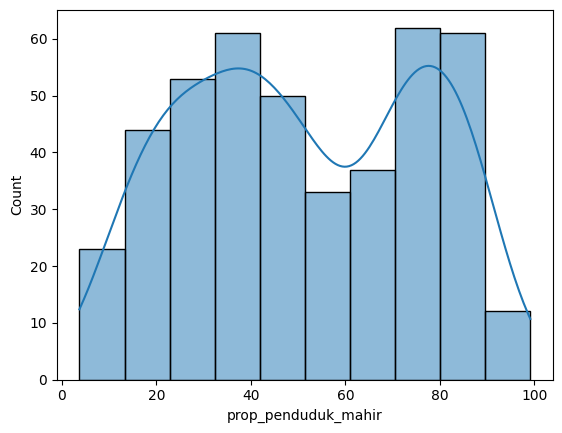

In [618]:
sns.histplot(df['prop_penduduk_mahir'], kde=True)

Dari gambar di atas, dapat disimpulkan bahwa data (prop_penduduk_mahir) tidak terdistribusi normal. Pada tahap ini, akan dilakukan analisis korelasi dengan menggunakan metode Kruskal Wallis dan Rank Spearman. Kedua metode ini digunakan karena kedua metode ini tidak memerlukan adanya asumsi normalitas data. Kedua metode ini merupakan alternatif dari metode- metode seperti Korelasi Pearson dan one-way ANOVA yang mengasumsikan bahwa data terdistribusi normal.

- Kruskal-Wallis: Digunakan untuk membandingkan median dari tiga atau lebih kelompok independen. Metode ini menjawab pertanyaan apakah ada perbedaan signifikan antara median kelompok-kelompok tersebut.
- Spearman: Mengukur kekuatan dan arah hubungan monoton antara dua variabel kontinu atau ordinal. Metode ini menjawab pertanyaan seberapa kuat hubungan antara dua variabel, tanpa mengasumsikan hubungan linear.

### Kateogri HDI dan Kualitas Pendidikan

<Axes: xlabel='kategori_hdi', ylabel='prop_penduduk_mahir'>

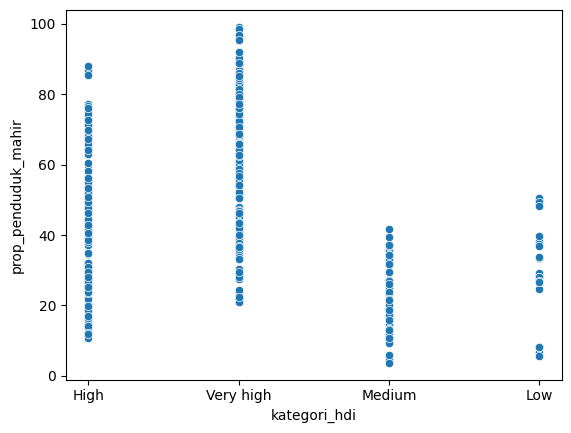

In [619]:
sns.scatterplot(x='kategori_hdi', y='prop_penduduk_mahir', data=df)

In [620]:
stats.kruskal(df['prop_penduduk_mahir'][df['kategori_hdi'] == 'Very high'],
            df['prop_penduduk_mahir'][df['kategori_hdi'] == 'High'],
            df['prop_penduduk_mahir'][df['kategori_hdi'] == 'Medium'],
            df['prop_penduduk_mahir'][df['kategori_hdi'] == 'Low']
            )

KruskalResult(statistic=200.91391100475428, pvalue=2.6772523317484587e-43)

### Tingkat Pendidikan dan Kualitas Pendidikan

<Axes: xlabel='tingkat_pendidikan', ylabel='prop_penduduk_mahir'>

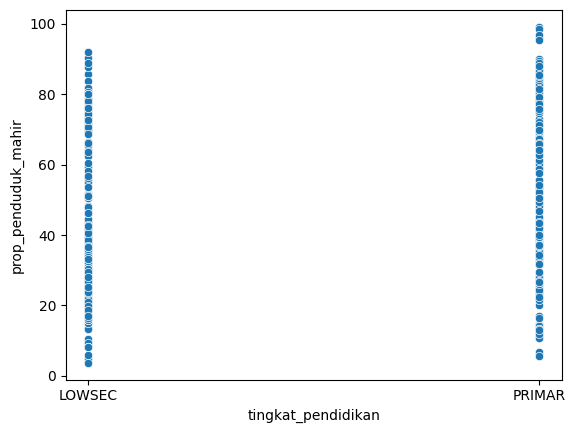

In [621]:
sns.scatterplot(x='tingkat_pendidikan', y='prop_penduduk_mahir', 
                data=df[(df['tingkat_pendidikan'] == 'PRIMAR') | (df['tingkat_pendidikan'] == 'LOWSEC')])

In [622]:
stats.kruskal(df['prop_penduduk_mahir'][df['tingkat_pendidikan'] == 'PRIMAR'], 
                df['prop_penduduk_mahir'][df['tingkat_pendidikan'] == 'LOWSEC'])

KruskalResult(statistic=12.811170808411452, pvalue=0.0003445558815374095)

### Jenis Kelamin dan Kualitas Pendidikan

<Axes: xlabel='sex', ylabel='prop_penduduk_mahir'>

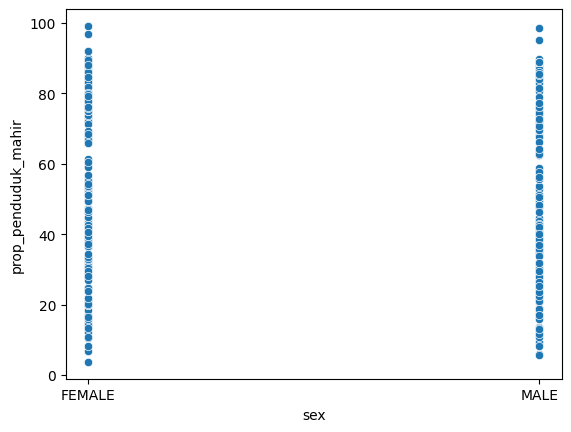

In [623]:
sns.scatterplot(x='sex', y='prop_penduduk_mahir', 
                data=df[(df['sex'] == 'MALE') | (df['sex'] == 'FEMALE')])

In [624]:
stats.kruskal(df['prop_penduduk_mahir'][df['sex'] == 'MALE'], 
                df['prop_penduduk_mahir'][df['sex'] == 'FEMALE'])

KruskalResult(statistic=1.4794214055432349, pvalue=0.22386507071387587)

### Akses Komputer dan Kualitas Pendidikan

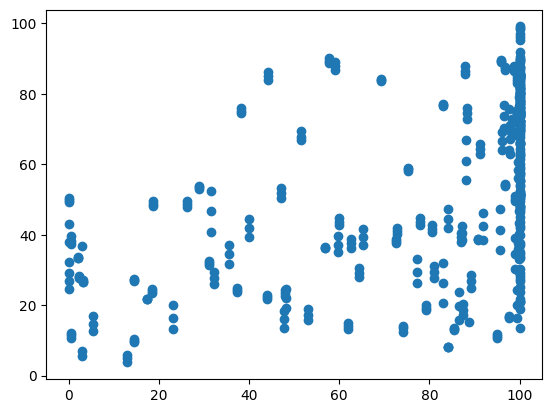

In [625]:
plt.scatter(df['akses_komputer'], df['prop_penduduk_mahir'])

In [626]:
df[['akses_komputer', 'prop_penduduk_mahir']].corr(method='spearman')

,akses_komputer,prop_penduduk_mahir
akses_komputer,1.000000,0.532803
prop_penduduk_mahir,0.532803,1.000000


### Akses Internet dan Kualitas Pendidikan

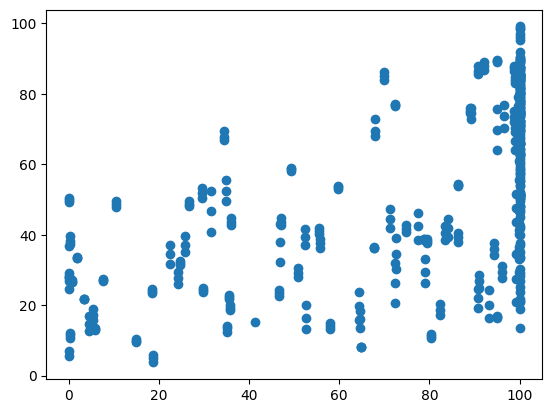

In [627]:
plt.scatter(df['akses_internet'], df['prop_penduduk_mahir'])

In [628]:
df[['akses_internet', 'prop_penduduk_mahir']].corr(method='spearman')

,akses_internet,prop_penduduk_mahir
akses_internet,1.000000,0.624509
prop_penduduk_mahir,0.624509,1.000000
